In [3]:
from unstructured.partition.pdf import partition_pdf

In [54]:
data_dir = "../data/CV for TGT/"
# file_path = data_dir + "1 - Mahalakshmi jaiswal  - Primary teacher - 2 Yrs 7 Months.pdf"
file_path = data_dir+"29 - Neha jain - Tgt(it) - 10 Yrs 0 Month.pdf"

In [55]:
chunks = partition_pdf(
    filename=file_path,
    extract_image_block_types=["Images"],
    extract_image_block_to_payload=True,
    # chunking_strategy="by_title",
    # max_characters=10000,
    # combine_text_under_n_chars=2000,
    # new_after_n_chars=6000,
)

The requested type (Images) doesn't match any available type


In [56]:
from unstructured.documents.elements import CompositeElement

In [57]:
sub_chunks = []

for chunk in chunks:
    if isinstance(chunk,CompositeElement):
        sub_chunks.append(chunk.metadata.orig_elements)
sub_chunks

[]

In [61]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image
from langchain_core.documents.base import Document


def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # Make legend
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()


def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
        
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

def chunk_elements(chunks:list):
    page_numbers=[1,2, 3, 4, 5]
    docs = []
    for element in chunks:
        metadata = element.metadata.to_dict()
        if "Title" in str(type(element)):
            metadata["category"]="Title"
        elif "Image" in str(type(element)):
            metadata["category"]="Image"
        else:
            metadata["category"]="text"
        # metadata["page_number"]=element.met
        docs.append(Document(page_content=element.text, metadata=metadata ))

    for page in page_numbers:
        render_page(docs,page)



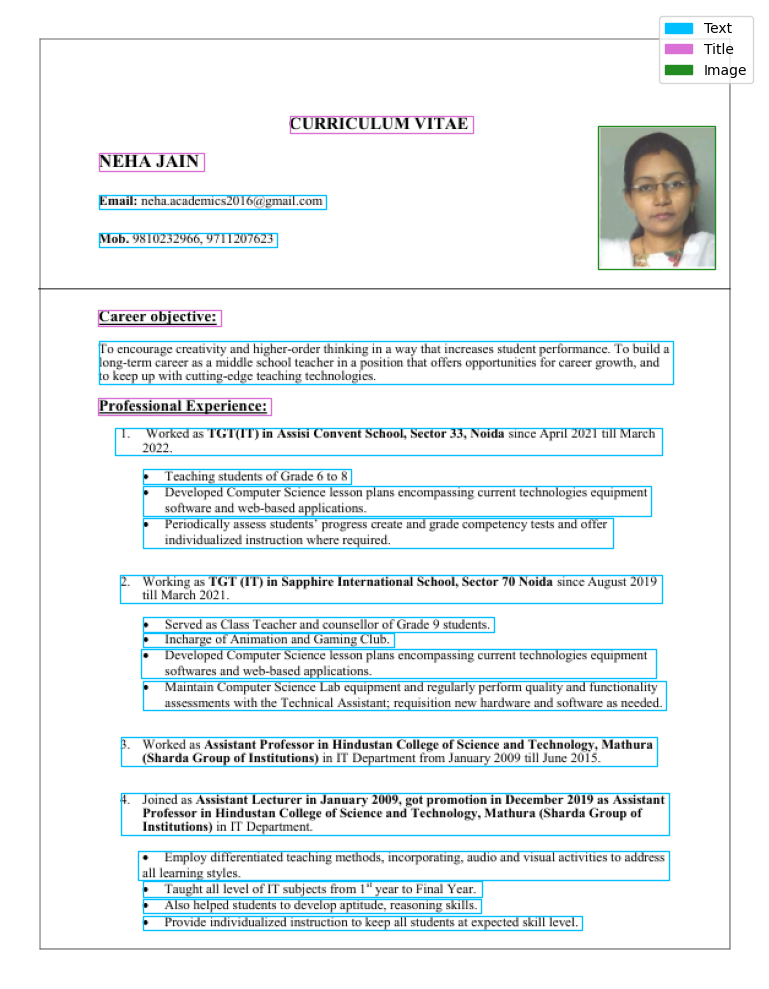

CURRICULUM VITAE

NEHA JAIN

Email: neha.academics2016@gmail.com

Mob. 9810232966, 9711207623



Career objective:

To encourage creativity and higher-order thinking in a way that increases student performance. To build a long-term career as a middle school teacher in a position that offers opportunities for career growth, and to keep up with cutting-edge teaching technologies.

Professional Experience:

1. Worked as TGT(IT) in Assisi Convent School, Sector 33, Noida since April 2021 till March 2022.

Teaching students of Grade 6 to 8

Developed Computer Science lesson plans encompassing current technologies equipment software and web-based applications.

Periodically assess students’ progress create and grade competency tests and offer individualized instruction where required.

2. Working as TGT (IT) in Sapphire International School, Sector 70 Noida since August 2019 till March 2021.

Served as Class Teacher and counsellor of Grade 9 students.

Incharge of Animation and Gaming Club.


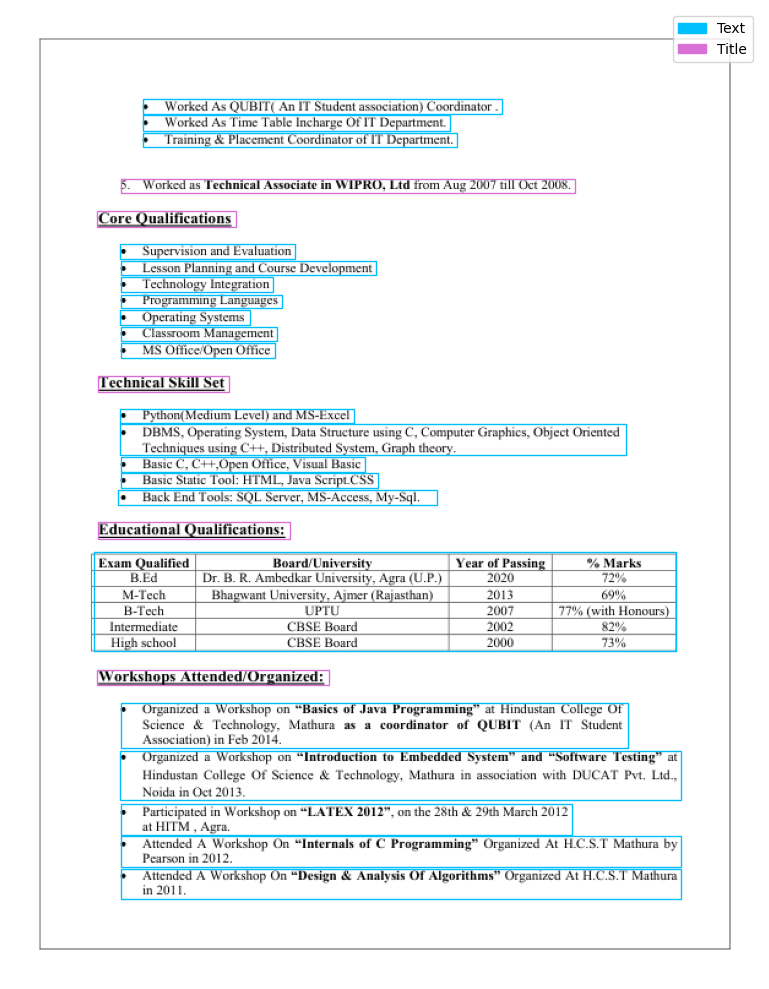

Worked As QUBIT( An IT Student association) Coordinator .

Worked As Time Table Incharge Of IT Department.

Training & Placement Coordinator of IT Department.

5. Worked as Technical Associate in WIPRO, Ltd from Aug 2007 till Oct 2008.

Core Qualifications

Supervision and Evaluation

Lesson Planning and Course Development

Technology Integration

Programming Languages

Operating Systems

Classroom Management

MS Office/Open Office

Technical Skill Set

Python(Medium Level) and MS-Excel

DBMS, Operating System, Data Structure using C, Computer Graphics, Object Oriented Techniques using C++, Distributed System, Graph theory.

Basic C, C++,Open Office, Visual Basic

Basic Static Tool: HTML, Java Script.CSS

Back End Tools: SQL Server, MS-Access, My-Sql.

Educational Qualifications:

Exam Qualified Board/University Year of Passing % Marks B.Ed Dr. B. R. Ambedkar University, Agra (U.P.) 2020 72% M-Tech Bhagwant University, Ajmer (Rajasthan) 2013 69% B-Tech UPTU 2007 77% (with Honours) Inte

In [60]:
chunk_elements(chunks)

In [63]:
file = "../../ocr/data/INVOICE 2.pdf"
stryker_chunks = partition_pdf(
    filename=file,
    extract_image_block_types=["Images"],
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=1500,
    new_after_n_chars=5000,
)

The requested type (Images) doesn't match any available type


KeyError: 'coordinates'

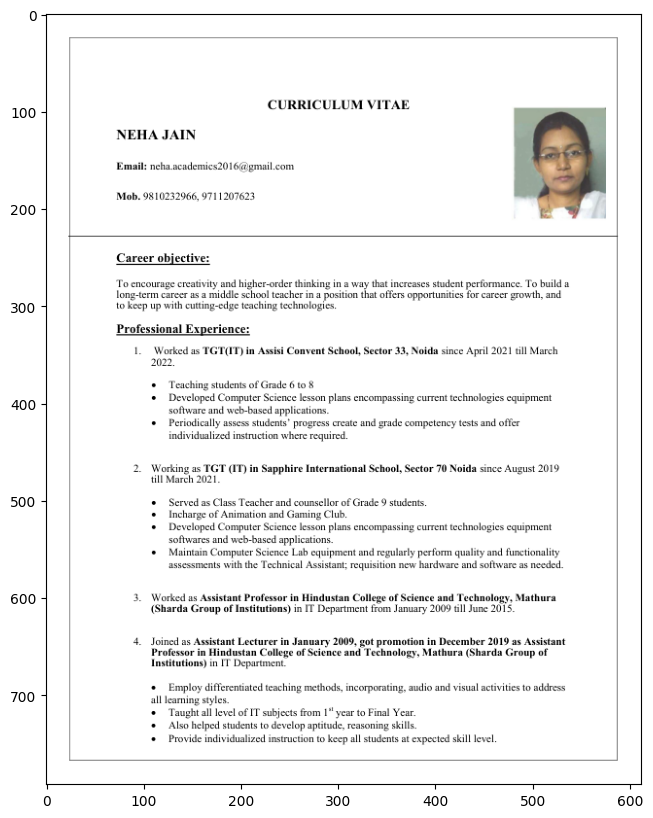

In [64]:
chunk_elements(stryker_chunks)

In [37]:
from langchain_community.document_loaders import UnstructuredPDFLoader

loader = UnstructuredPDFLoader(
    file_path=file_path,
    strategy="hi_res",
    # partition_via_api=True,
    coordinates=True,
)

docs = []
for doc in loader.lazy_load():
    docs.append(doc)

TypeError: unstructured.partition.common.common.add_element_metadata() got multiple values for keyword argument 'coordinates'

In [36]:
sub_chunks[0].metadata.to_dict()

{'detection_class_prob': 0.5724854469299316,
 'coordinates': {'points': ((589.75341796875, 140.87716674804688),
   (589.75341796875, 188.26177978515625),
   (1070.9444444444446, 188.26177978515625),
   (1070.9444444444446, 140.87716674804688)),
  'system': 'PixelSpace',
  'layout_width': 1654,
  'layout_height': 2338},
 'last_modified': '2025-02-13T13:11:40',
 'filetype': 'PPM',
 'languages': ['eng'],
 'page_number': 1}

KeyError: 'category'

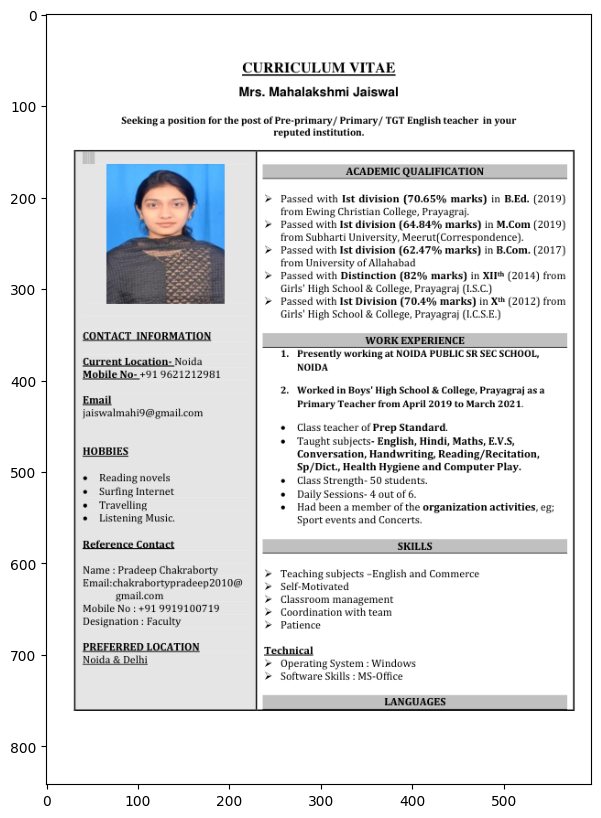

In [34]:
render_page(sub_chunks, 1)

In [30]:
sub_chunks[0].metadata.page_number

1

In [12]:
chunks

In [16]:
chunks[4].to_dict()

{'type': 'Title',
 'element_id': 'e3ba9193379bbcdd8fddd6021484e003',
 'text': 'ACADEMIC QUALIFICATION',
 'metadata': {'coordinates': {'points': ((909.5277777777777,
     462.45555555555535),
    (909.5277777777777, 495.78888888888866),
    (1335.611111111111, 495.78888888888866),
    (1335.611111111111, 462.45555555555535)),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2338},
  'last_modified': '2025-02-13T13:11:40',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 1,
  'file_directory': '../data/CV for TGT',
  'filename': '1 - Mahalakshmi jaiswal  - Primary teacher - 2 Yrs 7 Months.pdf'}}